<a href="https://colab.research.google.com/github/zychen1017/Machine-learning/blob/main/ML_Supervised_vs_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

##### 1. Fetch the data using sklearn datasets.

In [ ]:
# Load the MNIST dataset
mnist = datasets.fetch_openml('mnist_784', parser='auto')

# Extract the pixel_values and targets
pixel_values = mnist.data.astype('float32').values  # Convert DataFrame to numpy array
targets = mnist.target.astype('int')

**Takeaway**
1. astype('float32'): This converts the data type of the pixel values to float32. **Neural networks often work with float32 data**.

2. astype('int'): Since the targets are of string type, we convert them to integers.

3. values: This attribute returns the NumPy array representation of the DataFrame. The reason for using .values is to extract the underlying NumPy array from the pandas DataFrame. In the context of scikit-learn, many functions expect input in the form of NumPy arrays, so using **.values is a common way to ensure compatibility.**

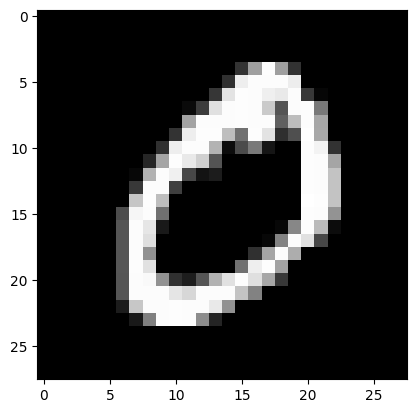

In [ ]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

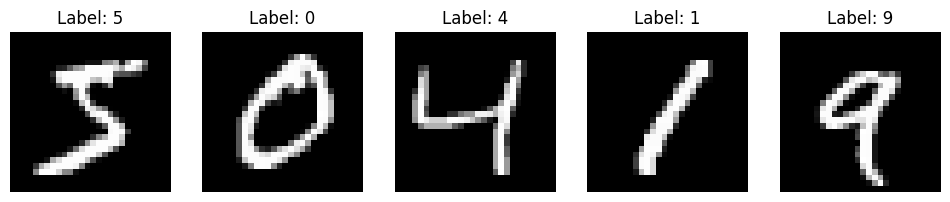

In [ ]:
# Display the first few images if you want to see more data
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    axes[i].imshow(pixel_values[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {targets[i]}")
    axes[i].axis('off')

plt.show()

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

**t-SNE**, or t-distributed stochastic neighbor embedding, is a machine learning algorithm used for **dimensionality reduction and visualization of high-dimensional data**. It's particularly effective for visualizing complex datasets in lower-dimensional spaces, such as 2D or 3D. t-SNE is commonly used in the field of machine learning and data analysis for exploratory data analysis and pattern recognition.

In [ ]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)
tsne_df["targets"] = tsne_df.targets.astype(int)

**np.column_stack** is a NumPy function that takes a sequence of 1-D arrays and stacks them as columns to create a 2-D array. It's essentially a way to concatenate arrays along the second axis (columns). This function is useful when you want to combine different arrays or vectors into a single 2-D array where each array becomes a column in the result.

In [ ]:
tsne_df.head()

,x,y,targets
0,19.203278,-10.117579,5
1,55.735435,-1.327751,0
2,-1.214005,-54.072609,4
3,-40.092121,11.861754,1
4,-10.239909,-33.525551,9


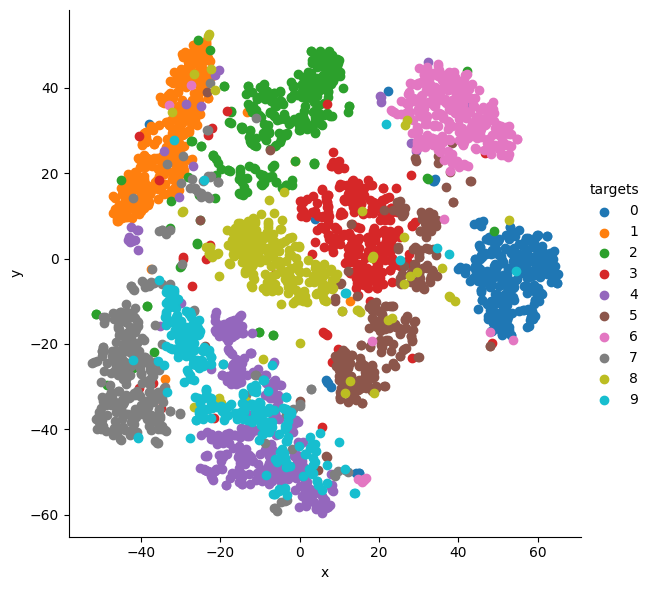

In [ ]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=6)
grid.map(plt.scatter, "x", "y").add_legend()

The **FacetGrid** in Seaborn is a versatile object that allows you to create a grid of subplots based on the values of one or more categorical variables. It is particularly useful when you want to compare the distribution or relationship of variables across different categories.  

After initializing the FacetGrid, you use the **map** method to apply a plotting function to each subset of the data.

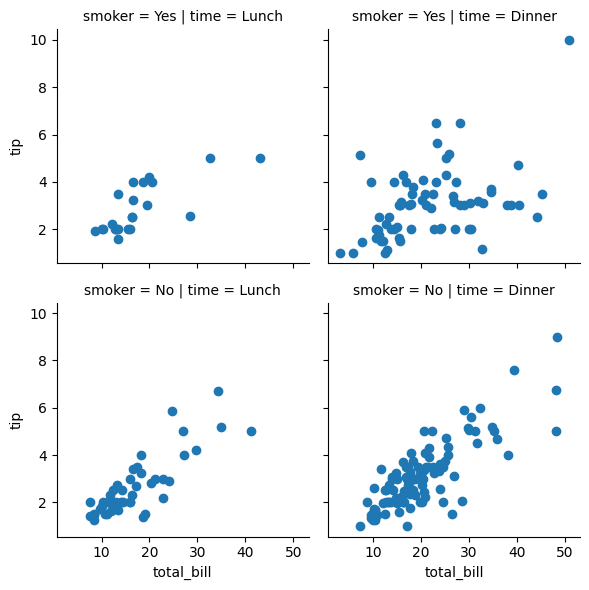

In [1]:
## One Example

# 使用 Seaborn 提供的数据集
tips = sns.load_dataset("tips")

# 创建一个 FacetGrid，按照 time 变量分割数据
g = sns.FacetGrid(tips, col="time", row="smoker")

# 在每个子图中绘制散点图
g.map(plt.scatter, "total_bill", "tip")

# 显示图形
plt.show()
